In [1]:
# 임베딩 레이어 (Embedding Layer) : 자연어를 수치화된 정보로 바꾸기 위한 레이어
# 감성 분석 (Sentiment Analysis) : 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제

import tensorflow as tf

# 예제 7.19 : Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file("train.txt", "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
path_to_test_file = tf.keras.utils.get_file("test.txt", "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

4898816/4893335 [==============================] - 0s 0us/step


In [2]:
# 예제 7.20 : 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. 인코딩 형식으로 utf-8을 지정해야 합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding = 'utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding = 'utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text : {} characters'.format(len(train_text)))
print('Length of text : {} characters'.format(len(test_text)))
print()

# 처음 300자를 확인해봅니다.
print(train_text[:300])

Length of text : 6937271 characters
Length of text : 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [3]:
# 예제 7.21 : 학습을 위한 정답 데이터 (Y) 만들기
import numpy as np

train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1 :] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1 :] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[: 5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [4]:
# 예제 7.22 : 훈련 데이터의 입력 (X) 정제
# 정규표현식 라이브러리
import re

# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)     
  string = re.sub(r"\'s", " \'s", string) 
  string = re.sub(r"\'ve", " \'ve", string) 
  string = re.sub(r"n\'t", " n\'t", string) 
  string = re.sub(r"\'re", " \'re", string) 
  string = re.sub(r"\'d", " \'d", string) 
  string = re.sub(r"\'ll", " \'ll", string) 
  string = re.sub(r",", " , ", string) 
  string = re.sub(r"!", " ! ", string) 
  string = re.sub(r"\(", " \( ", string) 
  string = re.sub(r"\)", " \) ", string) 
  string = re.sub(r"\?", " \? ", string) 
  string = re.sub(r"\s{2,}", " ", string)
  string = re.sub(r"\'{2,}", "\'", string)
  string = re.sub(r"\'", "", string)

  return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1 :] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


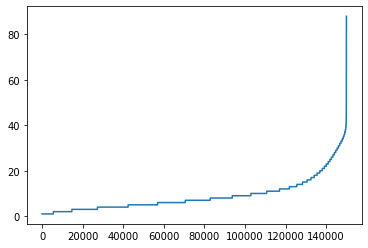

142587


In [5]:
# 예제 7.23 : 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()

plt.plot(sentence_len)
plt.show()

print(sum([int(l <= 25) for l in sentence_len]))

In [6]:
# 예제 7.24 : 단어 정제 및 문장 길이 줄임
sentences_new = []

for sentence in sentences:
  sentences_new.append([word[: 5] for word in sentence][: 25])

sentences = sentences_new

for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [7]:
# 예제 7.25 : Tokenizer와 pad_sequences를 이용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 20000) # 가장 빈도가 높은 2만개의 단어만 선택합니다.
tokenizer.fit_on_texts(sentences) # Tokenizer에 데이터를 실제로 입력합니다.
train_X = tokenizer.texts_to_sequences(sentences) # 문장을 입력받아 숫자를 반환합니다.
train_X = pad_sequences(train_X, padding = 'post') # 입력된 데이터에 패딩을 더합니다.
                                                   # padding option : (1) 'pre' - 문장의 앞에 패딩을 넣습니다.
                                                   #                  (2) 'post' - 문장의 뒤에 패딩을 넣습니다.
print(train_X[: 5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [8]:
# 예제 7.26 : Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])

temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)

temp = pad_sequences(temp, padding = 'post') # 공백에 0을 삽입합니다.
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [9]:
# 예제 7.27 : 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(20000, 300, input_length = 25),
                             tf.keras.layers.LSTM(units = 50),
                             tf.keras.layers.Dense(units = 2, activation = 'softmax')
])

# 정답인 Y가 희소 행렬일 때 sparse 사용합니다.
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 예제 7.28 : 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs = 5, batch_size = 128, validation_split = 0.2)

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.4329 - accuracy: 0.7869 - val_loss: 0.3885 - val_accuracy: 0.8196
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.3251 - accuracy: 0.8472 - val_loss: 0.3980 - val_accuracy: 0.8205
Epoch 3/5
938/938 [==============================] - 54s 57ms/step - loss: 0.2734 - accuracy: 0.8692 - val_loss: 0.4133 - val_accuracy: 0.8160
Epoch 4/5
938/938 [==============================] - 54s 57ms/step - loss: 0.2315 - accuracy: 0.8856 - val_loss: 0.4924 - val_accuracy: 0.8150
Epoch 5/5
938/938 [==============================] - 54s 58ms/step - loss: 0.1962 - accuracy: 0.9021 - val_loss: 0.5482 - val_accuracy: 0.8080


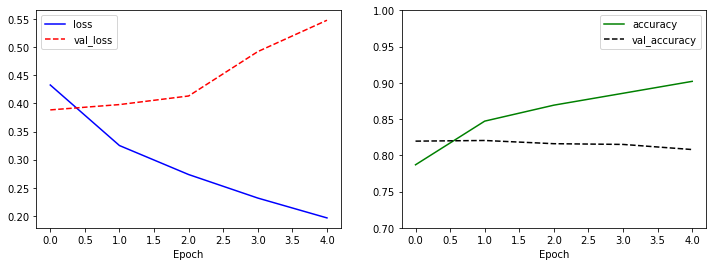

In [13]:
# 예제 7.29 : 감성 분석 모델의 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [14]:
# 예제 7.30 : 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1 :] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]

sentences_new = []
for sentence in sentences:
  sentences_new.append([word[: 5] for word in sentence][: 25])

sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding = 'post')

model.evaluate(test_X, test_Y, verbose = 0)

[0.5608747601509094, 0.8004400134086609]

In [15]:
# 예제 7.31 : 임의의 문장에 대한 감성 분석 결과 확인
test_sentence = "재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다."
test_sentence = test_sentence.split(' ')

test_sentences = []
now_sentence = []

for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding = 'post', maxlen = 25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
  print(sentence)
  print(prediction[idx])

['재미있을']
[0.37422362 0.6257764 ]
['재미있을', '줄']
[0.42404154 0.57595843]
['재미있을', '줄', '알았는데']
[0.49273804 0.507262  ]
['재미있을', '줄', '알았는데', '완전']
[0.494689 0.505311]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.494689 0.505311]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.5042005  0.49579948]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9883654  0.01163462]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.9984261  0.00157398]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9984261  0.00157398]
